In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd 
import sys
#import pickle
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.metrics import pairwise_distances
from sklearn.kernel_ridge import KernelRidge
import math
import dill as pickle

workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#connectivities/el_leafsurf_leafsmth_v3_leafleaf_' + str(eval_cre_list_name[c]) + '0422_visp

In [2]:

def fix_pdcsv(csv):
    
    #wt_conn = pd.read_csv('/Users/samsonkoelle/wt_leafsmooth_leafsurface_sumtarget.csv',  header=[0,1])
    csv_rownames = np.asarray(csv.iloc[:,0])
    csv = csv.iloc[:,1:]
    csv.index = csv_rownames
    return(csv)

def fill_df_na(data, indices):
    
    for i in range(indices.shape[0]):
        data.iloc[indices[i,0],indices[i,1]] = np.nan
        
    return(data)



In [3]:
eval_cre_list_name = ['C57BL6J', 'Cux2-IRES-Cre','Ntsr1-Cre_GN220','Rbp4-Cre_KL100','Tlx3-Cre_PL56']

source_reg = np.asarray(['MOp2/3', 'MOp5', 'MOp6a','MOs2/3', 'MOs5', 'MOs6a' ])

source_regions = np.asarray(['VISp2/3', 'VISp4', 'VISp5', 'VISp6a','VISl2/3','VISl4', 'VISl5', 'VISl6a'])
#source_regions = np.asarray(['VISp2/3', 'VISp4', 'VISp5', 'VISp6a'])
target_regions = [(  'ipsi',     'LGv'), (  'ipsi',     'LGd-sh'),
                  (  'ipsi',     'LGd-co'),
                  (  'ipsi',     'LGd-ip'),
                  ('ipsi','LP'),
                  (  'ipsi',     'VISp1'),
                  (  'ipsi',     'VISp2/3'),
                  (  'ipsi',     'VISp4'),
                  (  'ipsi',     'VISp5'),
                  (  'ipsi',     'VISp6a'),
                  (  'ipsi',     'VISl1'),
                 (  'ipsi',     'VISl2/3'),
                 (  'ipsi',     'VISl4'),
                 (  'ipsi',     'VISl5'),
                 (  'ipsi',     'VISl6a')]

#source_regions = np.asarray(['VISp2/3', 'VISp4', 'VISp5', 'VISp6a'])#,'VISl4', 'VISl5', 'VISl6a'])
# target_regions = [(  'ipsi',     'LGv'), (  'ipsi',     'LGd-sh'),
#                   (  'ipsi',     'LGd-co'),
#                   (  'ipsi',     'LGd-ip'),
#                   (  'ipsi',     'VISp1'),
#                   (  'ipsi',     'VISp2/3'),
#                   (  'ipsi',     'VISp4'),
#                   (  'ipsi',     'VISp5'),
#                   (  'ipsi',     'VISp6a'),
#                   (  'ipsi',     'VISl1'),
#                  (  'ipsi',     'VISl2/3'),
#                  (  'ipsi',     'VISl4'),
#                  (  'ipsi',     'VISl5'),
#                  (  'ipsi',     'VISl6a')]

targ_reg = [('ipsi',      'AId1'),
('ipsi',    'AId2/3'),
('ipsi',      'AId5'),
('ipsi',     'AId6a'),
('ipsi',      'AIv1'),
('ipsi',    'AIv2/3'),
('ipsi',      'AIv5'),
('ipsi',     'AIv6a'),
('ipsi',     'AIv6b'),
('ipsi',    'ORBvl1'),
('ipsi',  'ORBvl2/3'),
('ipsi',    'ORBvl5'),
('ipsi',   'ORBvl6a'),
('ipsi',   'ORBvl6b'),
('ipsi',     'TEa1'),
('ipsi',   'TEa2/3'),
('ipsi',     'TEa4'),
('ipsi',     'TEa5'),
('ipsi',    'TEa6a'),
('ipsi',    'TEa6b'),
('ipsi',     'BLAa'),
('ipsi',     'BLAp'),
('ipsi',     'BLAv'),
('ipsi',     'ECT1'),
('ipsi',   'ECT2/3'),
('ipsi',     'ECT5'),
('ipsi',    'ECT6a'),
('ipsi',    'ECT6b'),
('ipsi',   'CEAc'),
('ipsi',   'CEAl'),
('ipsi',   'CEAm')]

In [4]:
wt_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/connectivities/el_leafsurf_leafsmth_leafleaf_C57BL6J0428.csv',   header=[0, 1])
#wt_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/connectivities/el_sumsurf_leafsmth_leafleaf_C57BL6J0428.csv',   header=[0, 1])
Cux2_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/connectivities/el_leafsurf_leafsmth_leafleaf_Cux2-IRES-Cre0428.csv', header=[0, 1])
Ntsr1_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/connectivities/el_leafsurf_leafsmth_leafleaf_Ntsr1-Cre_GN2200428.csv',  header=[0, 1])
Rbp4_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/connectivities/el_leafsurf_leafsmth_leafleaf_Rbp4-Cre_KL1000428.csv',   header=[0, 1])
Tlx3_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/connectivities/el_leafsurf_leafsmth_leafleaf_Tlx3-Cre_PL560428.csv',   header=[0, 1])

wt_conn = fix_pdcsv(wt_conn)
Cux2_conn = fix_pdcsv(Cux2_conn)
Ntsr1_conn = fix_pdcsv(Ntsr1_conn)
Rbp4_conn = fix_pdcsv(Rbp4_conn)
Tlx3_conn = fix_pdcsv(Tlx3_conn)

lowlim = -7
wt_conn_log= np.log10(wt_conn)
Cux2_conn_log = np.log10(Cux2_conn)
Ntsr1_conn_log = np.log10(Ntsr1_conn)
Rbp4_conn_log= np.log10(Rbp4_conn)
Tlx3_conn_log= np.log10(Tlx3_conn)

wt_conn_log = wt_conn_log.clip(lower = lowlim)
Cux2_conn_log = Cux2_conn_log.clip(lower = lowlim)
Ntsr1_conn_log = Ntsr1_conn_log.clip(lower = lowlim)
Rbp4_conn_log = Rbp4_conn_log.clip(lower = lowlim)
Tlx3_conn_log = Tlx3_conn_log.clip(lower = lowlim)

/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 316.38409090909096, '')

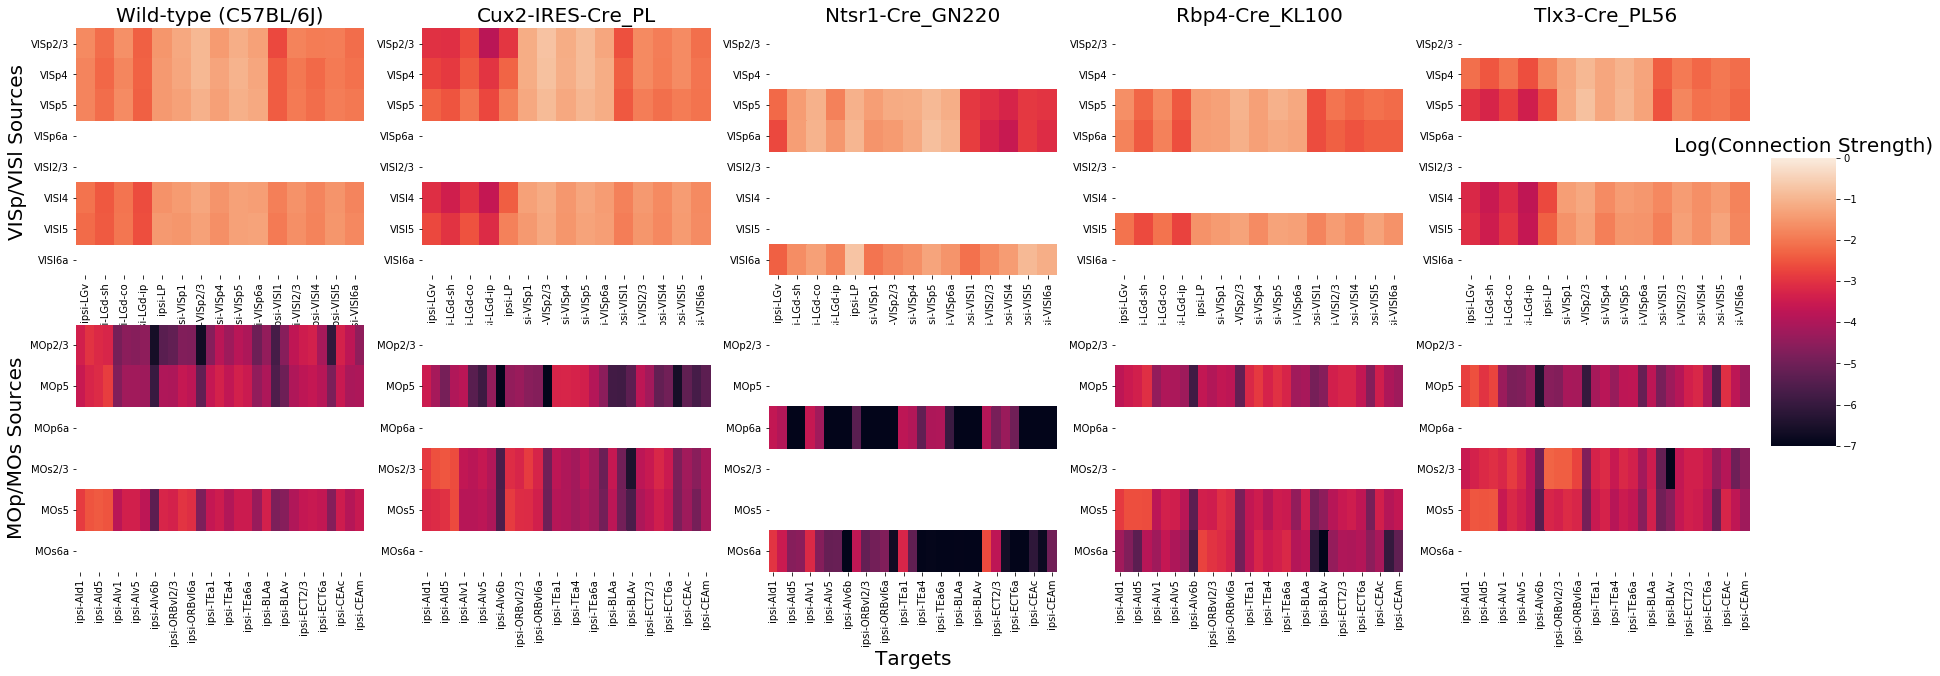

In [5]:
fig, axes = plt.subplots(2,5, figsize = (30,10))
cbar_ax = fig.add_axes([.91, .3, .03, .4])
#lowlim = -7
tp = wt_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,0], cbar = False)

tp = wt_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,0], cbar = False)

tp = Cux2_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,1], cbar = False)

tp = Cux2_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,1], cbar = False)

tp = Ntsr1_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,2], cbar = False)

tp = Ntsr1_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,2], cbar = False)

tp = Rbp4_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,3], cbar = False)

tp = Rbp4_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,3], cbar = False)

tp = Tlx3_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,4], cbar = False)

tp = Tlx3_conn_log.loc[source_reg].loc[:,targ_reg]
#tp.iloc[tuple(np.where(tp < lowlim))] = lowlim
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,4], cbar = True,cbar_ax= cbar_ax) #cbar_kws={'label': 'Log projection strength'})
cbar_ax.set_title('Log(Connection Strength)', fontsize = 20)

axes[0,0].set_title('Wild-type (C57BL/6J)', fontsize = 20)
axes[0,1].set_title('Cux2-IRES-Cre_PL', fontsize = 20)
axes[0,2].set_title('Ntsr1-Cre_GN220', fontsize = 20)
axes[0,3].set_title('Rbp4-Cre_KL100', fontsize = 20)
axes[0,4].set_title('Tlx3-Cre_PL56', fontsize = 20)

axes[1,0].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)
axes[1,1].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)
axes[1,2].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)
axes[1,3].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)
axes[1,4].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)

axes[1,0].set_ylabel('MOp/MOs Sources', fontsize = 20)
axes[0,0].set_ylabel('VISp/VISl Sources', fontsize = 20)

axes[1,1].set_ylabel('')
axes[0,1].set_ylabel('')

axes[1,2].set_ylabel('')
axes[0,2].set_ylabel('')

axes[1,3].set_ylabel('')
axes[0,3].set_ylabel('')

axes[1,4].set_ylabel('')
axes[0,4].set_ylabel('')

axes[1,0].set_xlabel('', fontsize = 20)
axes[0,0].set_xlabel('', fontsize = 20)

axes[1,1].set_xlabel('')
axes[0,1].set_xlabel('')

axes[1,2].set_xlabel('Targets', fontsize = 20)
axes[0,2].set_xlabel('', fontsize = 20)

axes[1,3].set_xlabel('')
axes[0,3].set_xlabel('')

axes[1,4].set_xlabel('')
axes[0,4].set_xlabel('')
#plt.savefig('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/analyses/visp_mo_1201')

In [10]:
av_data = pd.read_csv(workingdirectory + '/paper/connectivities/el_leafsurf_leafsmth_leafleaf_meandata_0428.csv',header=[0,1])
av_data = fix_pdcsv(av_data)
av_data_log = np.log10(av_data)

av_data_log = av_data_log.clip(lower = lowlim)


/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


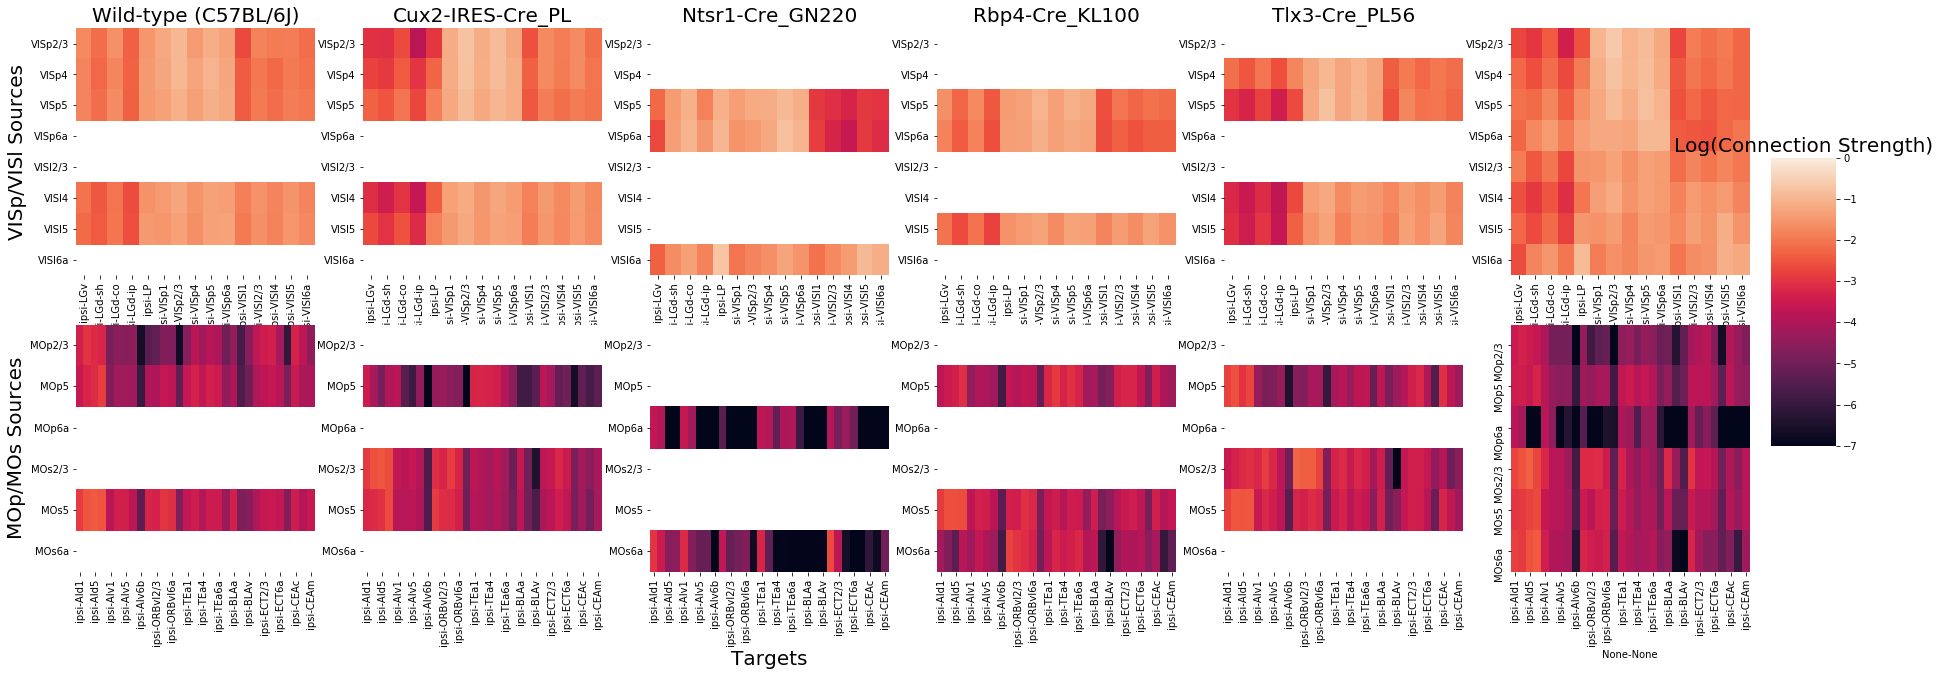

In [14]:
fig, axes = plt.subplots(2,6, figsize = (30,10))
cbar_ax = fig.add_axes([.91, .3, .03, .4])
#lowlim = -7
tp = wt_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,0], cbar = False)

tp = wt_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,0], cbar = False)

tp = Cux2_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,1], cbar = False)

tp = Cux2_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,1], cbar = False)

tp = Ntsr1_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,2], cbar = False)

tp = Ntsr1_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,2], cbar = False)

tp = Rbp4_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,3], cbar = False)

tp = Rbp4_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,3], cbar = False)

tp = Tlx3_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,4], cbar = False)

tp = Tlx3_conn_log.loc[source_reg].loc[:,targ_reg]
#tp.iloc[tuple(np.where(tp < lowlim))] = lowlim
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,4], cbar = True,cbar_ax= cbar_ax) #cbar_kws={'label': 'Log projection strength'})
cbar_ax.set_title('Log(Connection Strength)', fontsize = 20)

axes[0,0].set_title('Wild-type (C57BL/6J)', fontsize = 20)
axes[0,1].set_title('Cux2-IRES-Cre_PL', fontsize = 20)
axes[0,2].set_title('Ntsr1-Cre_GN220', fontsize = 20)
axes[0,3].set_title('Rbp4-Cre_KL100', fontsize = 20)
axes[0,4].set_title('Tlx3-Cre_PL56', fontsize = 20)

axes[1,0].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)
axes[1,1].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)
axes[1,2].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)
axes[1,3].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)
axes[1,4].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)

axes[1,0].set_ylabel('MOp/MOs Sources', fontsize = 20)
axes[0,0].set_ylabel('VISp/VISl Sources', fontsize = 20)

axes[1,1].set_ylabel('')
axes[0,1].set_ylabel('')

axes[1,2].set_ylabel('')
axes[0,2].set_ylabel('')

axes[1,3].set_ylabel('')
axes[0,3].set_ylabel('')

axes[1,4].set_ylabel('')
axes[0,4].set_ylabel('')

axes[1,0].set_xlabel('', fontsize = 20)
axes[0,0].set_xlabel('', fontsize = 20)

axes[1,1].set_xlabel('')
axes[0,1].set_xlabel('')

axes[1,2].set_xlabel('Targets', fontsize = 20)
axes[0,2].set_xlabel('', fontsize = 20)

axes[1,3].set_xlabel('')
axes[0,3].set_xlabel('')

axes[1,4].set_xlabel('')
axes[0,4].set_xlabel('')

tp = av_data_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,5], cbar = False)

tp = av_data_log.loc[source_reg].loc[:,targ_reg]
#tp.iloc[tuple(np.where(tp < lowlim))] = lowlim
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,5], cbar = True,cbar_ax= cbar_ax) #cbar_kws={'label': 'Log projection strength'})

#plt.savefig('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/analyses/visp_mo_1201')

In [19]:
#sns.heatmap(av_data_log.loc[['LGd-co', 'LGd-sh'], target_regions])

NameError: name 'comb_data' is not defined